In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Getting data and prepping it for histogram

mrna_df = pd.read_csv('data_mrna_seq_v2_rsem_zscores_ref_all_samples_transposed.csv')
mrna_df_1 = mrna_df.drop(519, axis="index") #duplicate

def remove01(x):
    return x.removesuffix('-01')  

    
ids = mrna_df_1['Hugo_Symbol']
new_ids = ids.apply(remove01)
mrna_df_1['Hugo_Symbol'] = new_ids

mrna_df_x = mrna_df_1.drop('Hugo_Symbol', axis='columns')
mrna_df_x.drop(0, axis='index', inplace=True)

print(mrna_df_x.head())

   LOC100130426  UBE2Q2P3  UBE2Q2P3.1  HMGB1P1  TIMM23  MOXD2  LOC155060  \
1       -3.0863   -0.5997      1.5294  -0.1743 -0.5550    NaN    -0.0905   
2       -3.0863   -0.8006     -0.8942  -1.4697  1.8552    NaN     0.1934   
3       -3.0863   -0.5059      0.9541  -0.4060 -0.3691    NaN     0.0083   
4       -3.0863   -1.0747     -0.1385   0.5085 -0.6454    NaN    -0.0301   
5       -3.0863    0.3223     -0.7343   0.3452  0.1476    NaN     0.9885   

   RNU12-2P    SSX9  LOC317712  ...    ZXDA    ZXDB    ZXDC  ZYG11A  ZYG11B  \
1   -1.9249 -0.9372        NaN  ... -1.3732 -1.5330 -1.8220  0.6648 -1.5634   
2    0.0736 -0.9372        NaN  ... -0.6671 -1.4660  0.1925 -1.1695 -0.2838   
3    0.6337 -0.9372        NaN  ...  0.6989  0.5530 -1.9006 -1.3729  0.2363   
4    0.9199 -0.9372        NaN  ...  0.1318  0.5613  0.3562  0.0273  0.2199   
5   -0.1476 -0.9372        NaN  ...  0.1838  0.1270  1.4465 -1.4210  0.3683   

      ZYX  FLJ10821    ZZZ3  TPTEP1  AKR1C6P  
1 -0.1694   -0.8894 -

In [3]:
#plt.hist(mrna_df_x.to_numpy())
#plt.show()

10772996
-143.6847


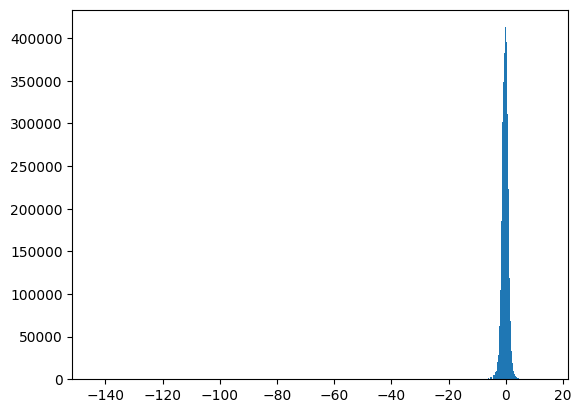

In [4]:
#convert df to np array for histogram (removing NaN)
test = mrna_df_x.values.flatten()
test = test[~pd.isnull(test)]
print(test.size)
print(np.min(test))
w=0.1
plt.hist(test, bins=np.arange(min(test), max(test) + w, w))
plt.show()


10770337


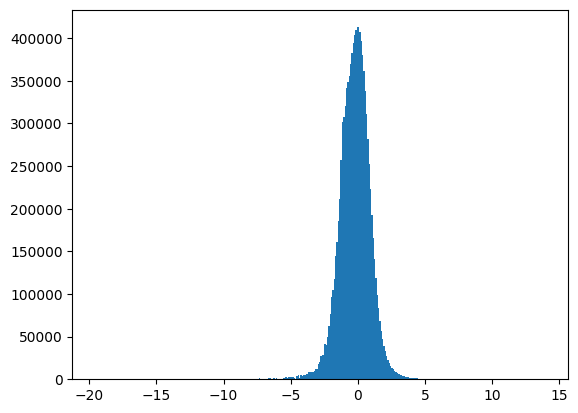

In [5]:
#clipping out large negative numbers
clipped_data = test[test>-20]
print(clipped_data.size)
w=0.1
plt.hist(clipped_data, bins=np.arange(min(clipped_data), max(clipped_data) + w, w))
plt.show()

In [8]:
mrna_df_1.drop(0, axis='index', inplace=True)



KeyError: '[0] not found in axis'

In [10]:
num = mrna_df_1._get_numeric_data()
num[num < -10] = None
num[num > 10] = None

print(mrna_df_1)

      Hugo_Symbol  LOC100130426  UBE2Q2P3  UBE2Q2P3.1  HMGB1P1  TIMM23  MOXD2  \
1    TCGA-3Z-A93Z       -3.0863   -0.5997      1.5294  -0.1743 -0.5550    NaN   
2    TCGA-6D-AA2E       -3.0863   -0.8006     -0.8942  -1.4697  1.8552    NaN   
3    TCGA-A3-3306       -3.0863   -0.5059      0.9541  -0.4060 -0.3691    NaN   
4    TCGA-A3-3307       -3.0863   -1.0747     -0.1385   0.5085 -0.6454    NaN   
5    TCGA-A3-3308       -3.0863    0.3223     -0.7343   0.3452  0.1476    NaN   
..            ...           ...       ...         ...      ...     ...    ...   
530  TCGA-MM-A563       -3.0863    0.0191     -0.3816   0.7654 -0.1537    NaN   
531  TCGA-MM-A564       -3.0863    1.6135     -0.6012   0.5317 -0.1316    NaN   
532  TCGA-MM-A84U       -3.0863   -0.6972      1.0341  -0.7856  1.7282    NaN   
533  TCGA-MW-A4EC       -3.0863    1.1870      0.9998   0.8189 -0.4700    NaN   
534  TCGA-T7-A92I       -3.0863   -0.3087      1.2304  -0.3162  1.3202    NaN   

     LOC155060  RNU12-2P   

In [11]:
recur_df = pd.read_csv('data_clinical_patient_onlydata.csv')
recur_ids = recur_df['PATIENT_ID']
recur_bool = recur_df['HISTORY_OTHER_MALIGNANCY']

y = []
for i in range(len(recur_bool)):
    if recur_ids[i] in new_ids.values:
        if recur_bool[i] == 'No':
            y.append(0)
        else:
            y.append(1)

print(y)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [12]:
mrna_df_data = mrna_df_1.drop('Hugo_Symbol', axis='columns')
print(mrna_df_data)

     LOC100130426  UBE2Q2P3  UBE2Q2P3.1  HMGB1P1  TIMM23  MOXD2  LOC155060  \
1         -3.0863   -0.5997      1.5294  -0.1743 -0.5550    NaN    -0.0905   
2         -3.0863   -0.8006     -0.8942  -1.4697  1.8552    NaN     0.1934   
3         -3.0863   -0.5059      0.9541  -0.4060 -0.3691    NaN     0.0083   
4         -3.0863   -1.0747     -0.1385   0.5085 -0.6454    NaN    -0.0301   
5         -3.0863    0.3223     -0.7343   0.3452  0.1476    NaN     0.9885   
..            ...       ...         ...      ...     ...    ...        ...   
530       -3.0863    0.0191     -0.3816   0.7654 -0.1537    NaN     1.4572   
531       -3.0863    1.6135     -0.6012   0.5317 -0.1316    NaN     2.2147   
532       -3.0863   -0.6972      1.0341  -0.7856  1.7282    NaN     0.8359   
533       -3.0863    1.1870      0.9998   0.8189 -0.4700    NaN     0.5836   
534       -3.0863   -0.3087      1.2304  -0.3162  1.3202    NaN    -0.0429   

     RNU12-2P    SSX9  LOC317712  ...    ZXDA    ZXDB    ZXDC  

In [ ]:
np.save('processed_mrna_data_zscore.npy', mrna_df_data.to_numpy())
np.save('processed_recurrence_data_zscore.npy', np.array(y))
